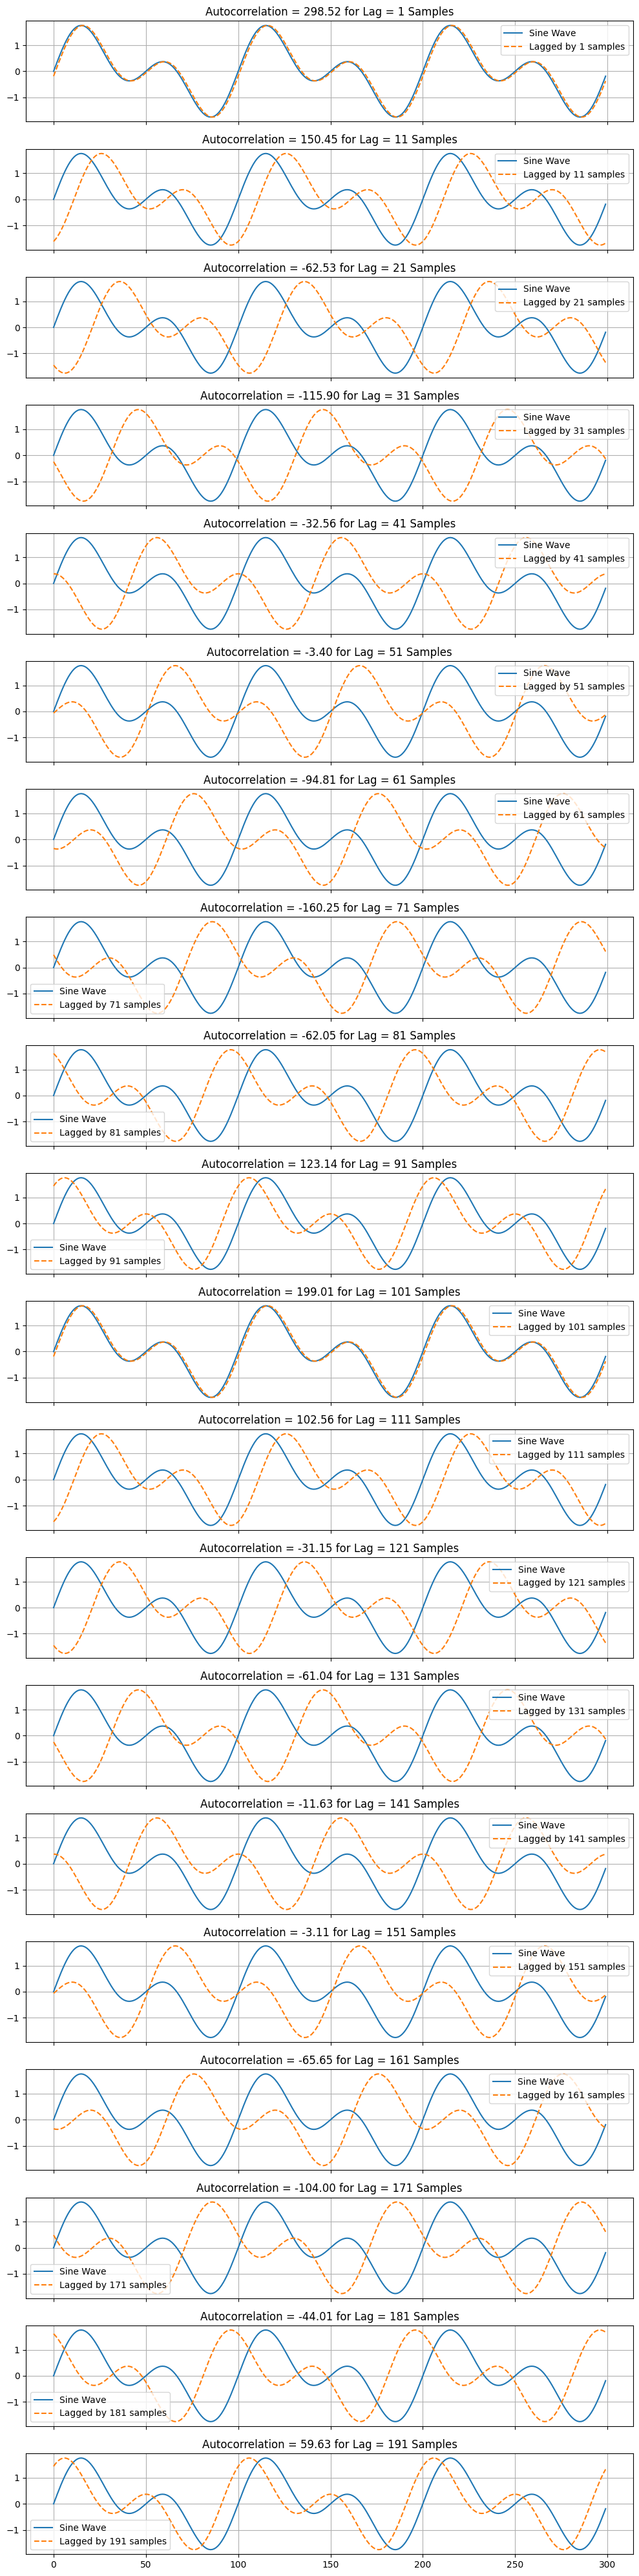

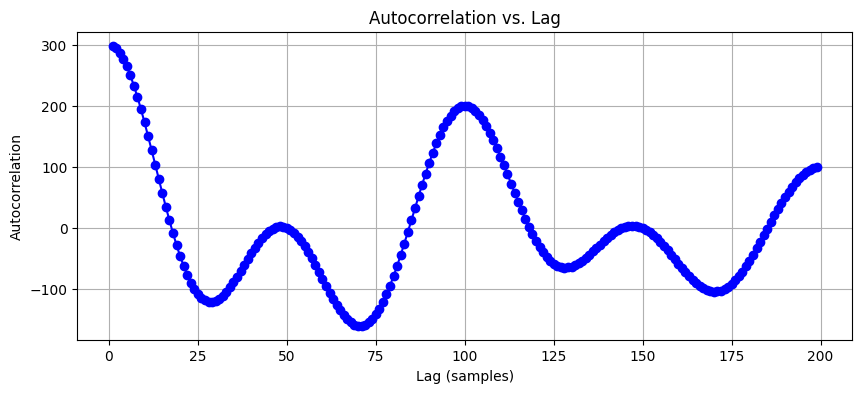

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave
fs = 1000  # Sampling frequency
T = 0.3  # Seconds
f0 = 10  # Fundamental frequency (F0)
t = np.arange(0, T, 1/fs)  # Time vector
sine_wave = np.sin(2 * np.pi * f0 * t)+np.sin(2 * np.pi * f0*2 * t)

# Function to compute autocorrelation for a specific lag
def autocorrelate(signal, lag):
    # Ensure proper normalization for a fair comparison across lags
    return np.correlate(signal[:-lag], signal[lag:])[0]

# Range of lags to demonstrate autocorrelation effects
lags = np.arange(1, int(fs/f0)*2)  # Up to two periods of the sine wave

# Prepare the plotting
fig, axs = plt.subplots(len(lags)//10 + 1, 1, figsize=(10, 2*(len(lags)//10 + 1)), sharex=True)

# Plot autocorrelation for each lag
for i, lag in enumerate(lags):
    if i % 10 == 0:  # Plot every 10th lag for clarity
        autocorr_value = autocorrelate(sine_wave, lag)
        ax = axs[i // 10]
        ax.plot(sine_wave, label='Sine Wave')
        ax.plot(np.roll(sine_wave, lag), label=f'Lagged by {lag} samples', linestyle='--')
        ax.set_title(f'Autocorrelation = {autocorr_value:.2f} for Lag = {lag} Samples')
        ax.legend()
        ax.grid(True)

plt.tight_layout()
plt.show()

# Calculating autocorrelation for each lag
autocorrelations = [autocorrelate(sine_wave, lag) for lag in lags]

# Plotting the sine wave autocorrelation vs. lag
plt.figure(figsize=(10, 4))
plt.plot(lags, autocorrelations, marker='o', linestyle='-', color='blue')
plt.title('Autocorrelation vs. Lag')
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

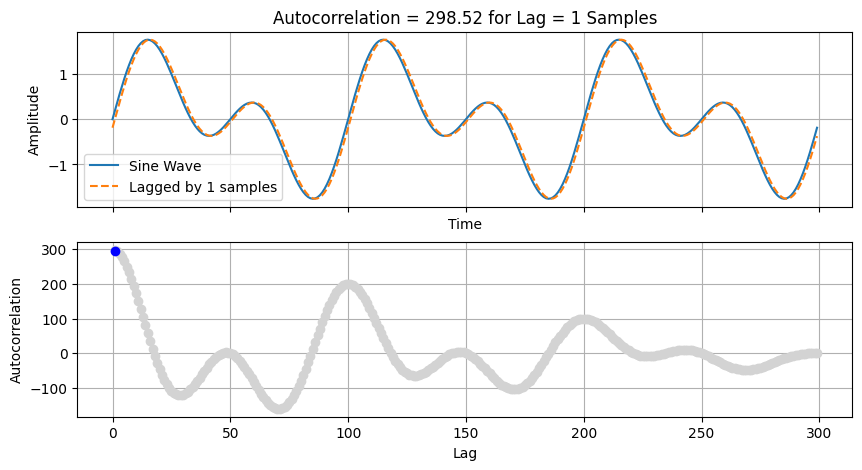

ValueError: x and y must have same first dimension, but have shapes (11,) and (1,)

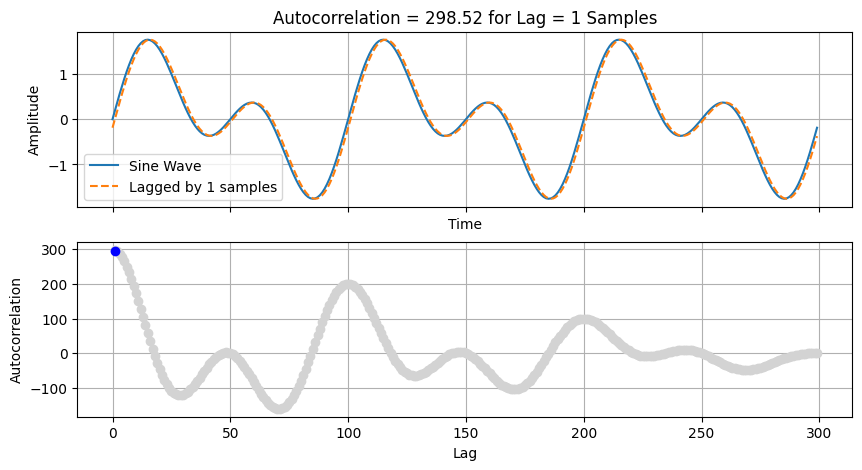

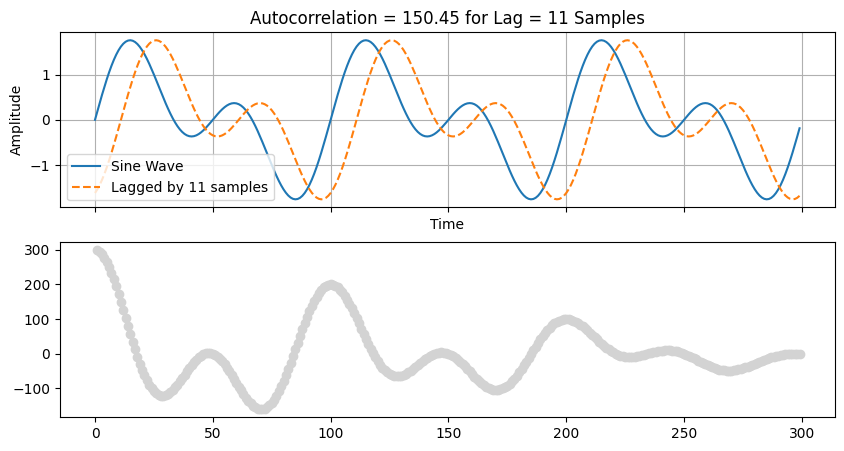

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave
fs = 1000  # Sampling frequency
T = 0.3  # Seconds
f0 = 10  # Fundamental frequency (F0)
t = np.arange(0, T, 1/fs)  # Time vector
sine_wave = np.sin(2 * np.pi * f0 * t)+np.sin(2 * np.pi * f0*2 * t)

# Function to compute autocorrelation for a specific lag
def autocorrelate(signal, lag):
    # Ensure proper normalization for a fair comparison across lags
    return np.correlate(signal[:-lag], signal[lag:])[0]

# Range of lags to demonstrate autocorrelation effects
lags = np.arange(1, int(fs/f0)*3)  # Up to two periods of the sine wave

# Get the autocorrelations
autocorrelations = [autocorrelate(sine_wave, lag) for lag in lags]


# Prepare the plotting



# Plot autocorrelation for each lag
for i, lag in enumerate(lags):
    if i % 10 == 0:  # Plot every 10th lag for clarity
        fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
        autocorr_value = autocorrelate(sine_wave, lag)
        ax = axs[0]
        ax.plot(sine_wave, label='Sine Wave')
        ax.plot(np.roll(sine_wave, lag), label=f'Lagged by {lag} samples', linestyle='--')
        ax.set_title(f'Autocorrelation = {autocorr_value:.2f} for Lag = {lag} Samples')
        ax.set_xlabel('Time')
        ax.set_ylabel('Amplitude')
        ax.legend()
        ax.grid(True)
        ax2 = axs[1]
        # Calculating autocorrelation for each lag
        ax2.plot(lags, autocorrelations, marker='o', linestyle='-', color='lightgray')
        ax2.plot(lags[:lag], autocorrelations[lag], marker='o', linestyle='-', color='blue')
        ax2.set_xlabel('Lag')
        ax2.set_ylabel('Autocorrelation')
        #ax2.set_title('Autocorrelation vs. Lag')
        ax2.grid(True)
        plt.plot(i)
        plt.show(i)

/tmp/ipykernel_48632/3101684818.py:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(lag, autocorr_value)
/tmp/ipykernel_48632/3101684818.py:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(lag, autocorr_value)


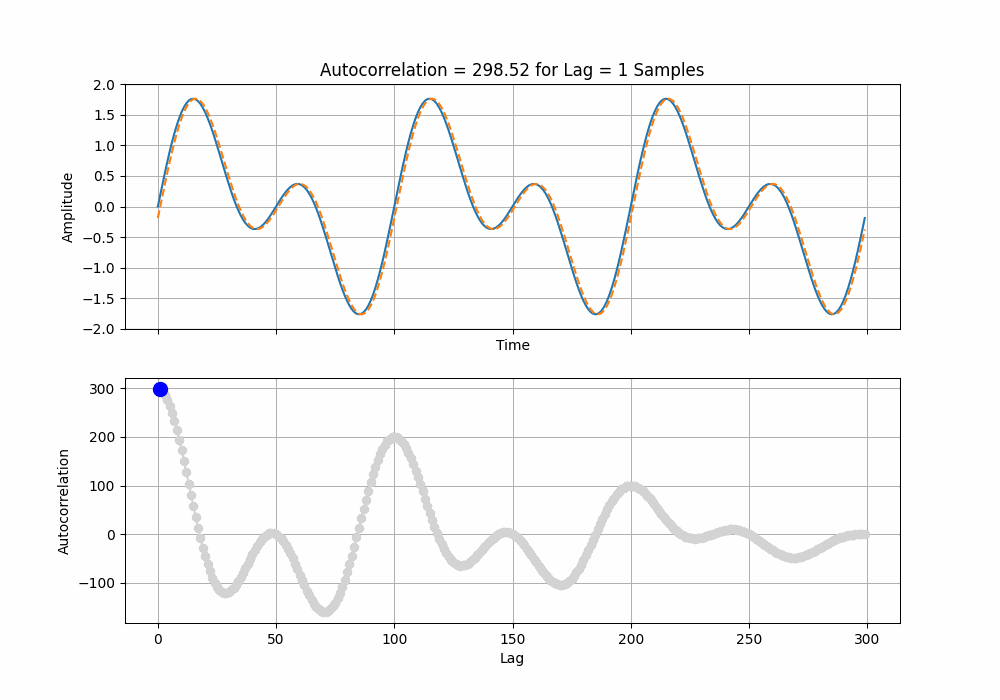

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
import io

# Assuming autocorrelate, sine_wave, lags, and autocorrelations are defined as per your provided snippets

# Generate a sine wave
fs = 1000  # Sampling frequency
T = 0.3  # Seconds
f0 = 10  # Fundamental frequency (F0)
t = np.arange(0, T, 1/fs)  # Time vector
sine_wave = np.sin(2 * np.pi * f0 * t)+np.sin(2 * np.pi * f0*2 * t)

# Function to compute autocorrelation for a specific lag
def autocorrelate(signal, lag):
    # Ensure proper normalization for a fair comparison across lags
    return np.correlate(signal[:-lag], signal[lag:])[0]

# Range of lags to demonstrate autocorrelation effects
lags = np.arange(1, int(fs/f0)*3)  # Up to two periods of the sine wave

# Get the autocorrelations
autocorrelations = [autocorrelate(sine_wave, lag) for lag in lags]

# Initialize the figure
fig, axs = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

# Plot that will be updated
line1, = axs[0].plot([], [], label='Sine Wave')
line2, = axs[0].plot([], [], label='Lagged by X samples', linestyle='--')
axs[1].plot(lags, autocorrelations, marker='o', linestyle='-', color='lightgray')
point, = axs[1].plot([], [], marker='o', color='blue',markersize=10)

# Setting labels and legends
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')
axs[0].set_ylim(-2,2)
axs[0].grid(True)

axs[1].set_xlabel('Lag')
axs[1].set_ylabel('Autocorrelation')
axs[1].grid(True)

# Animation update function
def update(i):
    lag = lags[i]
    autocorr_value = autocorrelations[i]
    line1.set_data(np.arange(sine_wave.size), sine_wave)
    line2.set_data(np.arange(sine_wave.size), np.roll(sine_wave, lag))
    axs[0].set_title(f'Autocorrelation = {autocorr_value:.2f} for Lag = {lag} Samples')
    point.set_data(lag, autocorr_value)
    return line1, line2, point

# Create animation
ani = FuncAnimation(fig, update, frames=range(len(lags)), blit=True)

# Save animation as GIF
gif_path = "autocorrelation_animation.gif"
ani.save(gif_path, writer='pillow', fps=5)

plt.close(fig)  # Prevents final frame plot from showing up at the end

# Display the GIF in the notebook if needed
with open(gif_path, "rb") as file:
    display(Image.open(file))
